### 막대 차트
- pyplot.bar
- align : 막대 정렬, height : 높이, width : 너비

In [3]:
import pandas as pd
df = pd.read_csv('./데이터/판매실적통합본.csv', encoding = 'euc-kr')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [4]:
# 제품군별 수량 합계 계산
grouped_df1 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df1

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [5]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10,8)

<BarContainer object of 6 artists>

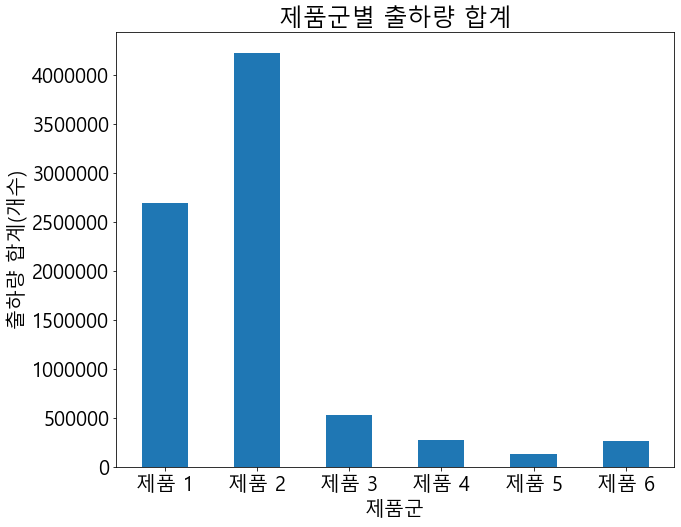

In [6]:
# 제품군별 출하량 합계 계산
plt.title('제품군별 출하량 합계')
plt.xlabel('제품군')
plt.ylabel('출하량 합계(개수)')
plt.bar(grouped_df1['제품군'], grouped_df1['수량'], width = 0.5)

##### 다중 bar chart 그리기
- groupby 혹은 set_index, unstack, pibot_table을 사용하면 쉽게 그릴 수 있음

In [9]:
plt.rcParams['figure.figsize'] = (40,15)
grouped_df2 = df.groupby(['제품군', '년도(year)'], as_index = True)['수량'].sum()
grouped_df2

제품군   년도(year)
제품 1  2016         637130
      2017         763450
      2018         807846
      2019         481881
제품 2  2016        1029868
      2017        1215031
      2018        1307538
      2019         670947
제품 3  2016         134693
      2017         154208
      2018         157031
      2019          86014
제품 4  2016          56774
      2017          82124
      2018          83692
      2019          54603
제품 5  2016          30142
      2017          36363
      2018          39851
      2019          19967
제품 6  2016          41612
      2017          64722
      2018          85157
      2019          71283
Name: 수량, dtype: int64

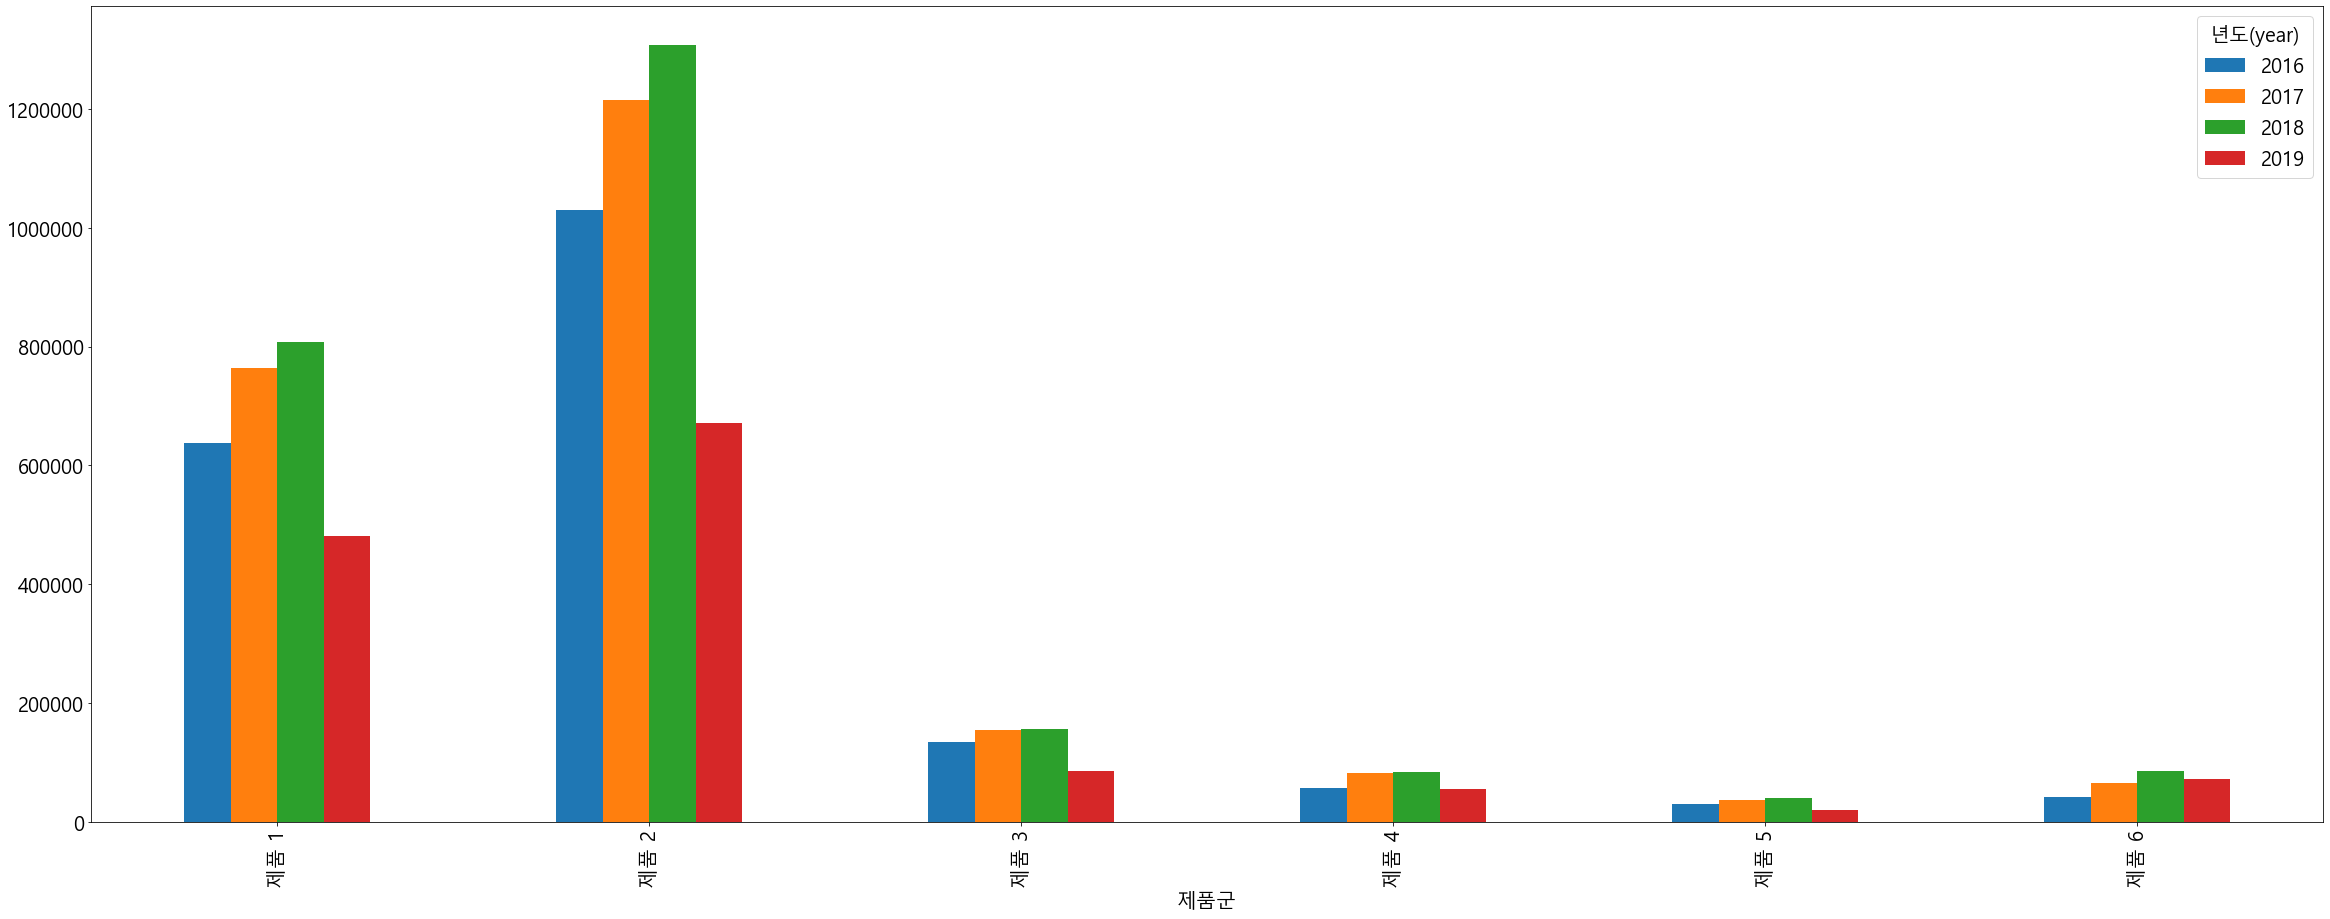

In [10]:
grouped_df2.unstack().plot(kind = 'bar')

### 파이 차트 그리기
- pyplot.pie
- labeldistance : 라벨 간 거리
- normalize : 비율을 나타낼 것인지 여부
- autopct : 위에 표시될 글자 형태
- colors : 배열로 설정해서 각 파트의 색상을 설정 가능

In [11]:
df = pd.read_csv('./데이터/판매실적통합본.csv', encoding = 'euc-kr')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [13]:
# 제품군별 수량 합계 계산
grouped_df = df.groupby(['제품군'], as_index = False)['수량'].sum()

# 기타 항 추가
other_row = pd.DataFrame({'제품군':['기타'],'수량':[grouped_df.sort_values(by='수량')['수량'].iloc[:4].sum()]})
                          
grouped_df = pd.concat([grouped_df, other_row], axis=0, ignore_index = True)
grouped_df = grouped_df.sort_values(by='수량', ascending = False).iloc[:3]
# 4개 기타의 합은 일단 합하긴 전 4개보단 클테니 내림차순일때 3개를 가져오면 기타와 아닌 애들과 기타 3가지만 가져온다
grouped_df

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236


([<matplotlib.patches.Wedge at 0x2318a662940>,
 [Text(-0.019438006431517805, 0.29936961085916564, '제품 2'),
  Text(-0.11660851500795197, -0.27640993872804254, '제품 1'),
  Text(0.2682736687188585, -0.13427300053295957, '기타')],
 [Text(-0.03887601286303561, 0.5987392217183313, '52.1%'),
  Text(-0.23321703001590394, -0.5528198774560851, '33.2%'),
  Text(0.536547337437717, -0.26854600106591914, '14.8%')])

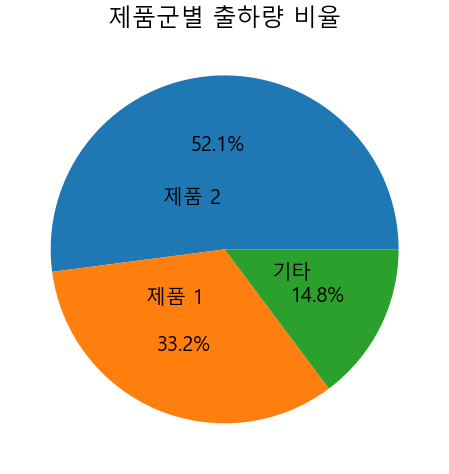

In [19]:
# 제품군별 출하량 합계 계산
plt.title('제품군별 출하량 비율')
plt.pie(x=grouped_df['수량'], labels= grouped_df['제품군'], 
        labeldistance = 0.3, autopct = '%1.1f%%')

### 박스 플롯 그리기
- pyplot.boxplot
- x : boxplot을 그리기 위한 데이터 (2차원이면 여러개)
- column : box plot을 그릴 컬럼 목록

In [21]:
df=pd.read_csv('./데이터/온라인_판매기록.csv', encoding = 'euc-kr')
df

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡
...,...,...,...,...,...
5810,애견아우랫,제품_41,5,696500,동물병원
5811,애견아우랫,제품_98,6,590400,동물병원
5812,애견아우랫,제품_77,5,512500,동물병원
5813,애견아우랫,제품_04,6,256200,동물병원


In [22]:
# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (15,8)

In [23]:
x = df.groupby(['쇼핑몰 유형'])['판매금액'].apply(list)
# 쇼핑몰 유형에 따른 판매금액 리스트
x

쇼핑몰 유형
동물병원      [338400, 202600, 238800, 1088000, 135800, 8768...
온라인II     [400800, 586600, 291900, 654000, 684000, 40400...
온라인사이트    [10400, 631400, 516400, 318000, 300000, 306600...
유통대리점     [220200, 10100, 112500, 56000, 236600, 928900,...
전시회       [498000, 195300, 143500, 478200, 358400, 10731...
쿠팡        [1134400, 439200, 495200, 578000, 75000, 19550...
할인점       [39100, 670400, 1533000, 438400, 403200, 19250...
할인점II     [119100, 101300, 124200, 101400, 291900, 37350...
Name: 판매금액, dtype: object

([<matplotlib.axis.XTick at 0x2318a7dcbb0>,
 <a list of 8 Text xticklabel objects>)

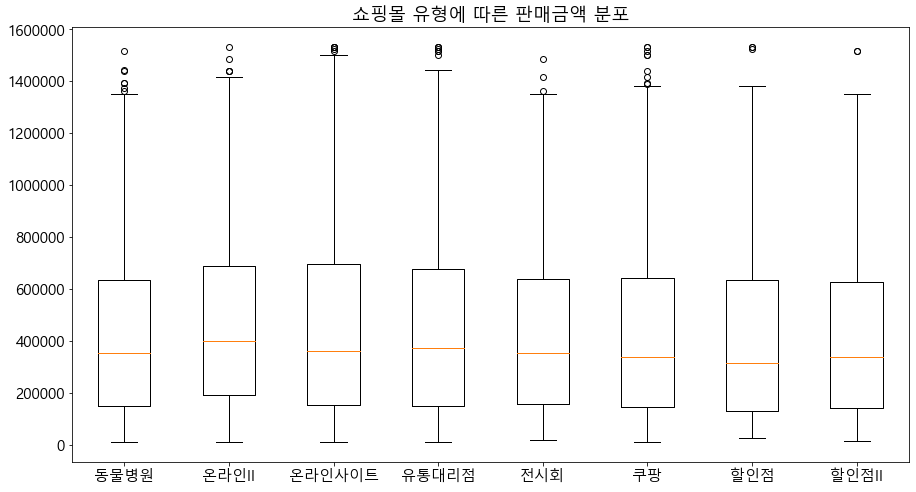

In [25]:
plt.title('쇼핑몰 유형에 따른 판매금액 분포')
plt.boxplot(x.values)
plt.xticks(np.arange(1, len(x)+1), x.index)

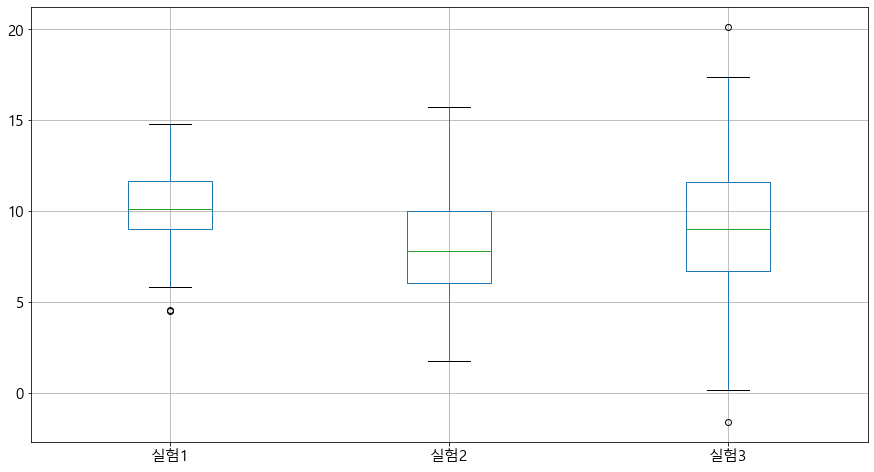

In [26]:
# DataFrame method를 이용한 box plot 그리기
df = pd.DataFrame({'실험1':np.random.normal(10,2,size=100),
                  '실험2':np.random.normal(8,3,size=100),
                  '실험3':np.random.normal(9,4,size=100)})
df.boxplot(column = ['실험1', '실험2', '실험3'])